In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import os
import math
#import imageio
from scipy.ndimage.interpolation import map_coordinates
from pprint import pprint
import glob
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
from copy import copy
from copy import deepcopy
#from mpl_toolkits.axes_grid1 import make
#_axes_locatable
%matplotlib inline
from scipy import stats
import multiprocessing as mp
import matplotlib.patches as patches

In [201]:
isccp

<xarray.Dataset>
Dimensions:             (cloud_irtype: 3, cloud_type: 18, edge: 2, lat: 180, levpc: 7, levtau: 6, lon: 360, satpos: 12, time: 2928)
Coordinates:
  * lon                 (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * levpc               (levpc) float32 95.0 245.0 375.0 500.0 620.0 740.0 912.5
  * levtau              (levtau) float32 0.5 2.3 6.0 14.5 34.74 109.8
  * time                (time) datetime64[ns] 2008-01-01 ... 2008-12-31T21:00:00
Dimensions without coordinates: cloud_irtype, cloud_type, edge, satpos
Data variables:
    satcodes            (time, satpos) int16 dask.array<chunksize=(248, 12), meta=np.ndarray>
    satids              (time, satpos) |S4 dask.array<chunksize=(248, 12), meta=np.ndarray>
    satnames            (time, satpos) |S20 dask.array<chunksize=(248, 12), meta=np.ndarray>
    eqheight            (time, lat, lon) int16 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    lon_bounds          (time, lon, edge) float32 dask.array<chunksize=(248, 360, 2), meta=np.ndarray>
    lat_bounds          (time, lat, edge) float32 dask.array<chunksize=(248, 180, 2), meta=np.ndarray>
    pc_bounds           (time, levpc, edge) float32 dask.array<chunksize=(248, 7, 2), meta=np.ndarray>
    tau_bounds          (time, levtau, edge) float32 dask.array<chunksize=(248, 6, 2), meta=np.ndarray>
    cloud_irtype_label  (time, cloud_irtype) |S80 dask.array<chunksize=(248, 3), meta=np.ndarray>
    cloud_type_label    (time, cloud_type) |S80 dask.array<chunksize=(248, 18), meta=np.ndarray>
    satcode             (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    cell_origin         (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    fill_gmts           (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    fill_days           (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    scene               (time, lat, lon) int8 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    snoice              (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    n_total             (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    cldamt              (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    cldamt_ir           (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    cldamt_irmarg       (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    n_pcdist            (time, levpc, lat, lon) float32 dask.array<chunksize=(248, 7, 180, 360), meta=np.ndarray>
    cldamt_irtypes      (time, cloud_irtype, lat, lon) float32 dask.array<chunksize=(248, 3, 180, 360), meta=np.ndarray>
    n_pctaudist         (time, levtau, levpc, lat, lon) float32 dask.array<chunksize=(248, 6, 7, 180, 360), meta=np.ndarray>
    cldamt_types        (time, cloud_type, lat, lon) float32 dask.array<chunksize=(248, 18, 180, 360), meta=np.ndarray>
    pc                  (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    pc_ir               (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    sigma_pc_ir         (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    tc                  (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    tc_ir               (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    sigma_tc_ir         (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    tau                 (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    tau_ir              (time, lat, lon) float32 dask.array<chunksize=(248, 180, 360), meta=np.ndarray>
    sigma_tau_ir        

In [2]:
_wbgyr_cdict = {'red': ((0.0,  255./255, 255./255),
                        (0.125, 173./255, 173./255),
                        (0.25,  95./255,  95./255),
                        (0.375, 73./255,  73./255),
                        (0.5,  165./255, 164./255),
                        (0.625, 248./255, 248./255),
                        (0.75, 236./255, 236./255),
                        (0.875, 200./255, 200./255),
                        (1.0,  146./255, 146./255)),
                'green': ((0.0,  255./255, 255./255),
                          (0.125, 224./255, 224./255),
                          (0.25, 163./255, 163./255),
                          (0.375, 166./255, 166./255),
                          (0.5,  207./255, 207./255),
                          (0.625, 184./255, 184./255),
                          (0.75,  86./255,  86./255),
                          (0.875, 29./255,  29./255),
                          (1.0,   21./255,  21./255)),
                'blue': ((0.0,  255./255, 255./255),
                         (0.125, 248./255, 248./255),
                         (0.25, 214./255, 214./255),
                         (0.375, 120./255, 120./255),
                         (0.5,   81./255,  81./255),
                         (0.625, 73./255,  73./255),
                         (0.75,  41./255,  41./255),
                         (0.875, 38./255,  38./255),
                         (1.0,   25./255,  25./255))}
# And reverse
_wbgyr_cdict_r = deepcopy(_wbgyr_cdict)
for i in _wbgyr_cdict_r.keys():
    _wbgyr_cdict_r[i] = [(1-j[0], j[1], j[2]) for j in _wbgyr_cdict_r[i]]
    _wbgyr_cdict_r[i].reverse()

cmap = LinearSegmentedColormap('WBGYR', _wbgyr_cdict)
cmap.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap)

cmap_r = LinearSegmentedColormap('WBGYR', _wbgyr_cdict_r)
cmap_r.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap_r)

In [30]:
levpc[3:]

<xarray.DataArray 'levpc' (levpc: 4)>
array([500. , 620. , 740. , 912.5], dtype=float32)
Coordinates:
  * levpc    (levpc) float32 500.0 620.0 740.0 912.5
Attributes:
    long_name:    Pressure levels
    units:        hPa
    bounds:       pc_bounds
    description:  Coordinate variable for cloud frequency histograms

In [18]:
import warnings
print('is it doing?')

yedges_net = np.arange(-650,650,1)
yedges_lw = np.arange(-500,0,1)
yedges_sw = np.arange(-100,900,1)
yedges_solar = np.arange(0,1400,5)
xedges = np.arange(0,500,1)
cereshour = 8760
k=0
year = 2008

tsc = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/TSCISCCP/TSC_convolve/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
landocean = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/TSCISCCP/TSC_convolve/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvOrigin'][:,2:62]
aodtsc = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/TSCISCCP/TSC_convolve/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvAOD'][:,2:62]
detinsit = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/TSCISCCP/TSC_CURRENT/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvCir'][:,2:62]

isccp = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/ISCCP/access/isccp-basic/hgg/'+str(year)+'*/200*.nc',combine='nested',concat_dim='time')
taupc = isccp['n_pctaudist']
levtau = isccp['levtau']
levpc = isccp['levpc']
tauraw = isccp['tau']
pcraw = isccp['pc']
isccptime = isccp['time']

ds_w = xr.open_mfdataset('/net/seldon/disk1/Data/CERES/SYN1deg-Hour-Ed4/'+str(year)+'/CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Total_*.nc',combine = 'by_coords', concat_dim="time")
swall = ds_w['toa_sw_all_1h'][:]
swclr = ds_w['toa_sw_clr_1h'][:]
lwall = ds_w['toa_lw_all_1h'][:]
lwclr = ds_w['toa_lw_clr_1h'][:]
netall = ds_w['toa_net_all_1h'][:]
netclr = ds_w['toa_net_clr_1h'][:]
solar = ds_w['toa_solar_all_1h'][:]
timeceres = ds_w['time'][:]
cf = ds_w['cldarea_total_1h'][:]

LW_AVERAGE_det = np.zeros((7,499))
SW_AVERAGE_det = np.zeros((7,499))
LW_AVERAGE_ins = np.zeros((7,499))
SW_AVERAGE_ins = np.zeros((7,499))
LW_AVERAGE_all = np.zeros((7,499))
SW_AVERAGE_all = np.zeros((7,499))

offset = np.argmin(np.abs(isccp['time'][:].values - ds_w['time'][0].values))

meanlw = np.nanmean(lwclr[:],axis=0)

cloudlayer = np.zeros((7,2856,60,360))
for j in range(3):
    print('doing: ' + str(j))
    lowcloudraw = np.nansum(np.nansum(isccp['n_pctaudist'][offset:,:,j:,60:120],axis=1),axis=1)
    lowcloud_day = np.where(lowcloudraw<0,np.nan,lowcloudraw)
    lowcloud_night = np.where(np.nansum(isccp['n_pcdist'][offset:,j:,60:120],axis=1)>100,np.nan,np.nansum(isccp['n_pcdist'][offset:,j:,60:120],axis=1))
    lowcloud = np.where(np.isnan(lowcloud_day),lowcloud_night,lowcloud_day)
    cloudlayer[j] = lowcloud

timeceres[0::3][0:len(isccp['time'][offset:])]


swcldy  = (swall[0::3][0:len(isccp['time'][offset:])] - swclr[0::3][0:len(isccp['time'][offset:])])
netcldy = (netall[0::3][0:len(isccp['time'][offset:])] - netclr[0::3][0:len(isccp['time'][offset:])])

lwclr_f = np.where(np.isnan(lwclr[0::3][0:len(isccp['time'][offset:])]),meanlw,lwclr[0::3][0:len(isccp['time'][offset:])])
lwcldy = (lwall[0::3][0:len(isccp['time'][offset:])] - lwclr_f) 
solar_t = solar[0::3][0:len(isccp['time'][offset:])]

swcldy_fg = np.zeros((7,2856,60,360))
lwcldy_f = np.zeros((7,2856,60,360))
for k in range(3):
    lwcldy_f[k] = np.where((cloudlayer[k]<1),lwcldy,np.nan)
    swcldy_f_nans = np.where((cloudlayer[k]<1),swcldy,np.nan)
    swcldy_f = np.where(solar_t>0,swcldy_f_nans,0)
    swcldy_fg[k] = np.where(cloudlayer[k]<1,swcldy_f,np.nan)
    print('DOIN ' +str(k))


tsc_t = (np.asarray(tsc[offset*3::3]))
tsc_d = np.asarray(np.where(detinsit>0,tsc,np.nan)[offset*3::3])
tsc_i = np.asarray(np.where(detinsit<0,tsc,np.nan)[offset*3::3])
print('DOIN ')

for l in range(4):
    print(l)
    H_sw_o_det, xedges, yedges_sw = np.histogram2d(tsc_d.flatten(),np.asarray(swcldy_fg[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_sw))
    H_lw_o_det, xedges, yedges_lw = np.histogram2d(tsc_d.flatten(),np.asarray(lwcldy_f[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_lw))

    H_sw_o_ins, xedges, yedges_sw = np.histogram2d(tsc_i.flatten(),np.asarray(swcldy_fg[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_sw))
    H_lw_o_ins, xedges, yedges_lw = np.histogram2d(tsc_i.flatten(),np.asarray(lwcldy_f[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_lw))

    H_sw_o_all, xedges, yedges_sw = np.histogram2d(tsc_t.flatten(),np.asarray(swcldy_fg[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_sw))
    H_lw_o_all, xedges, yedges_lw = np.histogram2d(tsc_t.flatten(),np.asarray(lwcldy_f[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_lw))
    print(str(l) + ' DOIN ')

    H_norm_lw_det = np.zeros((499,499))
    H_norm_sw_det = np.zeros((499,999))

    H_norm_lw_ins = np.zeros((499,499))
    H_norm_sw_ins = np.zeros((499,999))

    H_norm_lw_all = np.zeros((499,499))
    H_norm_sw_all = np.zeros((499,999))
    for i in range(499):
        H_norm_lw_det[i] = H_lw_o_det[i] / np.sum(H_lw_o_det[i])
        H_norm_sw_det[i] = H_sw_o_det[i] / np.sum(H_sw_o_det[i])

        H_norm_sw_ins[i] = H_sw_o_ins[i] / np.sum(H_sw_o_ins[i])
        H_norm_lw_ins[i] = H_lw_o_ins[i] / np.sum(H_lw_o_ins[i])

        H_norm_sw_all[i] = H_sw_o_all[i] / np.sum(H_sw_o_all[i])
        H_norm_lw_all[i] = H_lw_o_all[i] / np.sum(H_lw_o_all[i])


    for i in range(499):

        LW_AVERAGE_det[l,i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_det[i])
        SW_AVERAGE_det[l,i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_det[i])

        LW_AVERAGE_ins[l,i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_ins[i])
        SW_AVERAGE_ins[l,i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_ins[i])

        LW_AVERAGE_all[l,i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_all[i])
        SW_AVERAGE_all[l,i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_all[i])



is it doing?


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice


doing: 0
doing: 1
doing: 2
DOIN 0
DOIN 1
DOIN 2
DOIN 
0
0 DOIN 
1


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide


1 DOIN 
2
2 DOIN 
3
3 DOIN 


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in true_divide


(0.0, 120.0)

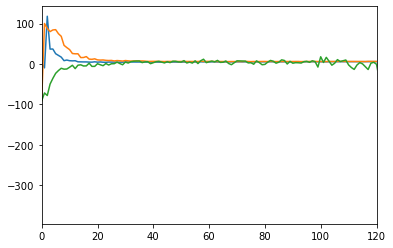

In [17]:
plt.plot(SW_AVERAGE_all[0]+LW_AVERAGE_all[0],label='0')
plt.plot(SW_AVERAGE_all[1]+LW_AVERAGE_all[1],label='1')
plt.plot(SW_AVERAGE_det[2]+LW_AVERAGE_det[2],label='2')
plt.xlim(0,120)

In [19]:
LW_AVERAGE_det = np.zeros((7,499))
SW_AVERAGE_det = np.zeros((7,499))
LW_AVERAGE_ins = np.zeros((7,499))
SW_AVERAGE_ins = np.zeros((7,499))
LW_AVERAGE_all = np.zeros((7,499))
SW_AVERAGE_all = np.zeros((7,499))

for l in range(7):

    H_sw_o_det, xedges, yedges_sw = np.histogram2d(tsc_d.flatten(),np.asarray(swcldy_fg[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_sw))
    H_lw_o_det, xedges, yedges_lw = np.histogram2d(tsc_d.flatten(),np.asarray(lwcldy_f[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_lw))

    H_sw_o_ins, xedges, yedges_sw = np.histogram2d(tsc_i.flatten(),np.asarray(swcldy_fg[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_sw))
    H_lw_o_ins, xedges, yedges_lw = np.histogram2d(tsc_i.flatten(),np.asarray(lwcldy_f[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_lw))

    H_sw_o_all, xedges, yedges_sw = np.histogram2d(tsc_t.flatten(),np.asarray(swcldy_fg[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_sw))
    H_lw_o_all, xedges, yedges_lw = np.histogram2d(tsc_t.flatten(),np.asarray(lwcldy_f[l][0:len(tsc_d)]).flatten(), bins=(xedges,yedges_lw))
    print(str(l) + ' DOIN ')

    H_norm_lw_det = np.zeros((499,499))
    H_norm_sw_det = np.zeros((499,999))

    H_norm_lw_ins = np.zeros((499,499))
    H_norm_sw_ins = np.zeros((499,999))

    H_norm_lw_all = np.zeros((499,499))
    H_norm_sw_all = np.zeros((499,999))
    for i in range(499):
        H_norm_lw_det[i] = H_lw_o_det[i] / np.sum(H_lw_o_det[i])
        H_norm_sw_det[i] = H_sw_o_det[i] / np.sum(H_sw_o_det[i])

        H_norm_sw_ins[i] = H_sw_o_ins[i] / np.sum(H_sw_o_ins[i])
        H_norm_lw_ins[i] = H_lw_o_ins[i] / np.sum(H_lw_o_ins[i])

        H_norm_sw_all[i] = H_sw_o_all[i] / np.sum(H_sw_o_all[i])
        H_norm_lw_all[i] = H_lw_o_all[i] / np.sum(H_lw_o_all[i])

    for i in range(499):

        LW_AVERAGE_det[l,i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_det[i])
        SW_AVERAGE_det[l,i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_det[i])

        LW_AVERAGE_ins[l,i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_ins[i])
        SW_AVERAGE_ins[l,i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_ins[i])

        LW_AVERAGE_all[l,i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_all[i])
        SW_AVERAGE_all[l,i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_all[i])

0 DOIN 


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


1 DOIN 
2 DOIN 
3 DOIN 


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


4 DOIN 
5 DOIN 
6 DOIN 


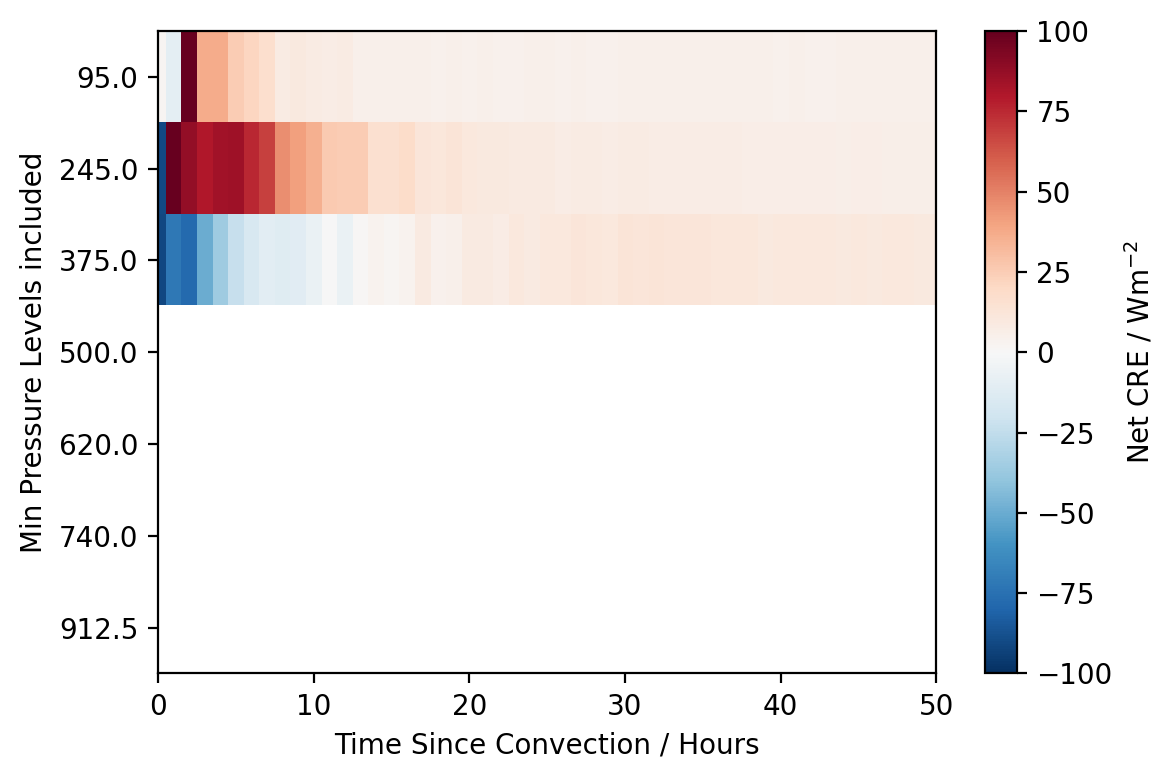

In [31]:
plt.figure(dpi=200)

plt.imshow(SW_AVERAGE_all+LW_AVERAGE_all,aspect='auto',interpolation='none',cmap='RdBu_r',vmax=100,vmin=-100)
plt.colorbar(label='Net CRE / Wm$^{-2}$')
plt.xlim(0,50)
plt.xlabel('Time Since Convection / Hours')
plt.yticks(np.arange(0,7,1))
plt.yticks(ticks = np.arange(0,7,1),labels=np.asarray(isccp['levpc']))
plt.ylabel('Min Pressure Levels included')
plt.tight_layout()
#plt.savefig('Pressure Levels CRE.png',dpi=600)

In [185]:

l=7
plt.figure(dpi=200)
plt.plot(LW_AVERAGE_all[l])
plt.plot(SW_AVERAGE_all[l])

plt.plot(LW_AVERAGE_all[l]+SW_AVERAGE_all[l])
plt.xlim(0,120)

IndexError: index 7 is out of bounds for axis 0 with size 7

<Figure size 1200x800 with 0 Axes>

/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


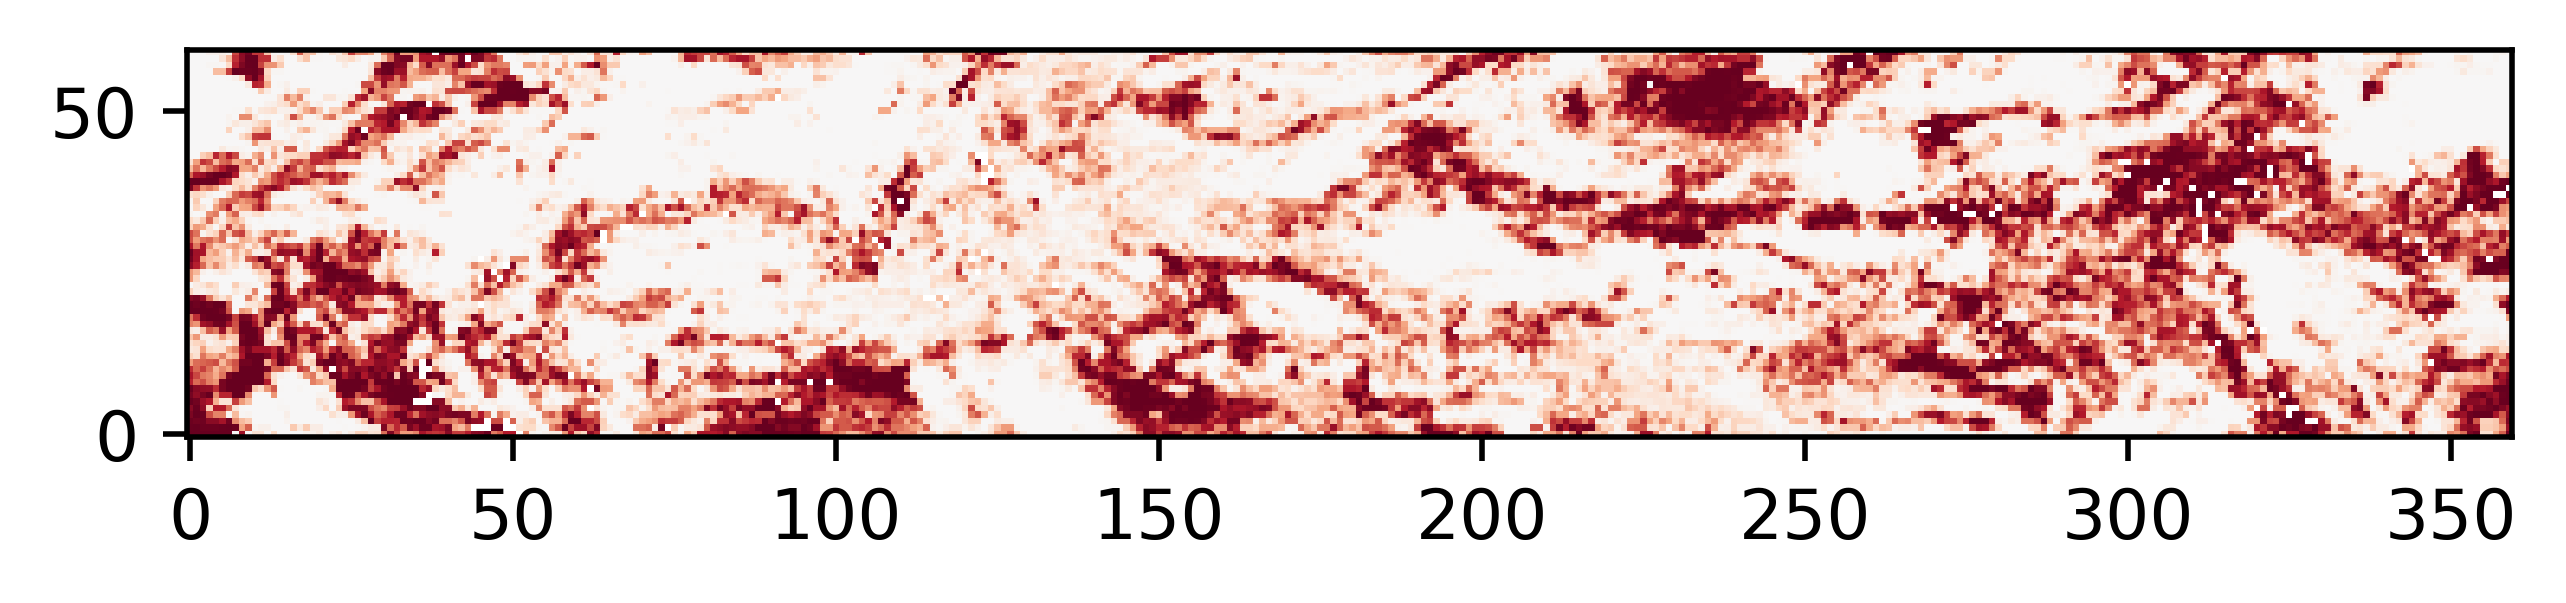

In [91]:
plt.figure(dpi=500)
plt.imshow(np.nanmean(cloudlayer[2][:],axis=0) - np.nanmean(cloudlayer[6][:],axis=0),interpolation='none',origin='lower',vmax=100,vmin=-100,cmap='RdBu_r')

In [100]:
isccp['n_pctaudist'][0,:,6:]

<xarray.DataArray 'n_pctaudist' (levtau: 6, levpc: 1, lat: 180, lon: 360)>
dask.array<getitem, shape=(6, 1, 180, 360), dtype=float32, chunksize=(6, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * levpc    (levpc) float32 912.5
  * levtau   (levtau) float32 0.5 2.3 6.0 14.5 34.74 109.8
    time     datetime64[ns] 2008-01-01
Attributes:
    long_name:      Cloudy pixel fraction in each cloud-top pressure (PC)/clo...
    units:          1
    valid_min:      -500
    valid_max:      500
    description:    Cloud detected by either IR or VIS threshold, cloud top l...
    standard_name:  isccp_cloud_area_fraction